In [5]:
import pandas as pd       
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error                  
import os    
#load dataset 
df=pd.read_csv('E:/train.csv')
df=df.dropna()

<font size=5>Exploratory Data Analysis

In [6]:
df.head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0,1.000241,26670118.88,1.000241,1.000241,1.000026,19319.31,1.000241,16149.55,1.000143,-10.039806,30,0_300_0
5731,1,0,300,242332.96,-1,1.000073,3242054.27,0.981974,0.994490,0.999544,43205.40,1.000308,2042.76,1.000273,-1.329780,30,0_300_1
5732,2,0,300,0.00,0,1.000193,4671376.00,1.000193,1.000193,0.999035,18971.00,1.001036,59688.26,0.999518,14.009476,30,0_300_2
5733,3,0,300,2914730.16,1,0.999870,41057776.66,1.003870,1.002279,0.999827,25569.50,1.000042,37897.50,0.999914,-4.339814,30,0_300_3
5734,4,0,300,3396923.02,1,0.998496,38356174.88,1.007894,1.007894,0.998357,14446.00,0.998703,2601.18,0.998650,10.850430,30,0_300_4
5735,5,0,300,0.00,0,1.001878,19816808.10,1.001878,1.001878,1.001531,77171.78,1.001980,6147.00,1.001947,-6.279945,30,0_300_5
5736,6,0,300,2290880.11,1,1.000493,6222660.84,1.020254,1.008032,1.000010,110949.94,1.000493,476.41,1.000490,-2.139807,30,0_300_6
5737,7,0,300,5743260.87,-1,0.997609,59880787.67,0.972086,0.992924,0.997609,6410.30,0.998138,17958.36,0.997748,11.379719,30,0_300_7
5738,8,0,300,3049995.87,1,0.999183,21575575.33,1.016710,1.005503,0.998155,6495.81,1.000248,299433.78,0.998200,0.729561,30,0_300_8
5739,9,0,300,0.00,0,1.000484,12825322.65,1.000484,1.000484,1.000323,18529.03,1.000484,7871.46,1.000436,-15.140176,30,0_300_9


In [7]:
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06,2.343638e+06
mean,9.929842e+01,2.416909e+02,4.208454e+02,2.674538e+06,-1.927857e-02,9.999800e-01,5.655001e+07,1.001713e+00,9.996339e-01,9.997474e-01,6.925980e+04,1.000210e+00,7.206801e+04,9.999754e-01,-3.844931e-02,1.333509e+04
std,5.792988e+01,1.385309e+02,7.211704e+01,8.972488e+06,8.339197e-01,3.071593e-03,1.597747e+08,7.214705e-01,1.011072e-02,3.034809e-03,1.333315e+05,3.042026e-03,1.536279e+05,3.034197e-03,8.377038e+00,7.619197e+03
min,0.000000e+00,0.000000e+00,3.000000e+02,0.000000e+00,-1.000000e+00,9.352850e-01,5.224498e+04,7.700000e-05,8.954110e-01,9.349150e-01,7.600000e-01,9.398270e-01,7.000000e-01,9.380080e-01,-3.197599e+02,3.000000e+01
25%,4.900000e+01,1.220000e+02,3.600000e+02,0.000000e+00,-1.000000e+00,9.982650e-01,8.602116e+06,9.963320e-01,9.971520e-01,9.980720e-01,1.043571e+04,9.984990e-01,1.132280e+04,9.982820e-01,-4.090071e+00,6.752000e+03
50%,9.900000e+01,2.420000e+02,4.200000e+02,5.246706e+05,0.000000e+00,9.999220e-01,1.881124e+07,9.998830e-01,9.998830e-01,9.997200e-01,3.109928e+04,1.000127e+00,3.297583e+04,9.999220e-01,-3.993511e-02,1.336400e+04
75%,1.500000e+02,3.620000e+02,4.800000e+02,2.215482e+06,1.000000e+00,1.001616e+00,4.324082e+07,1.003318e+00,1.002518e+00,1.001378e+00,7.712412e+04,1.001809e+00,8.053019e+04,1.001592e+00,3.980398e+00,1.994300e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,1.028671e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.198614e+00,1.077488e+00,2.868065e+07,1.077836e+00,5.179944e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [9]:
df.shape

(2343638, 17)

In [14]:
df.isnull().sum()/df.shape[0]

stock_id                   0.0
date_id                    0.0
seconds_in_bucket          0.0
imbalance_size             0.0
imbalance_buy_sell_flag    0.0
reference_price            0.0
matched_size               0.0
far_price                  0.0
near_price                 0.0
bid_price                  0.0
bid_size                   0.0
ask_price                  0.0
ask_size                   0.0
wap                        0.0
target                     0.0
time_id                    0.0
row_id                     0.0
dtype: float64

<font size=4>The Distribution Of Target Vatiable

Text(0, 0.5, 'Frequency')

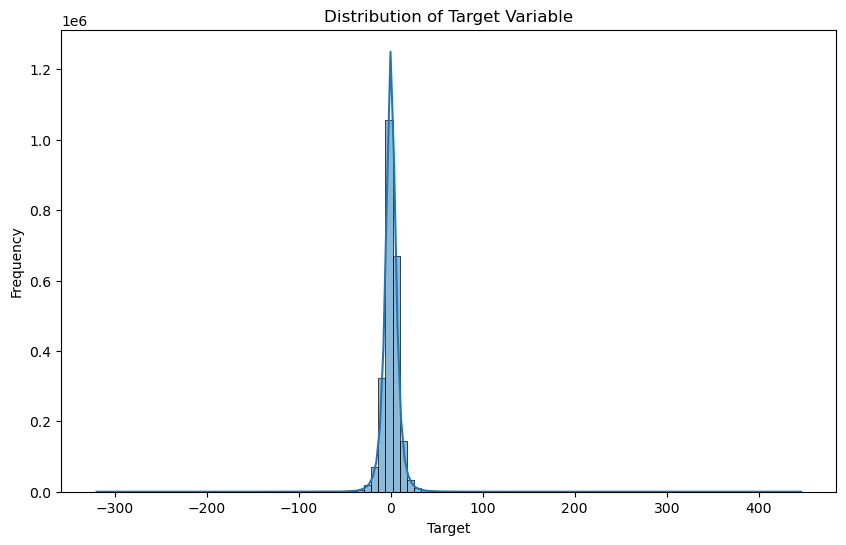

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data=df
plt.figure(figsize=(10, 6))
sns.histplot(data['target'], bins=100, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')

<font size =4> Average Target Value Over 480 days

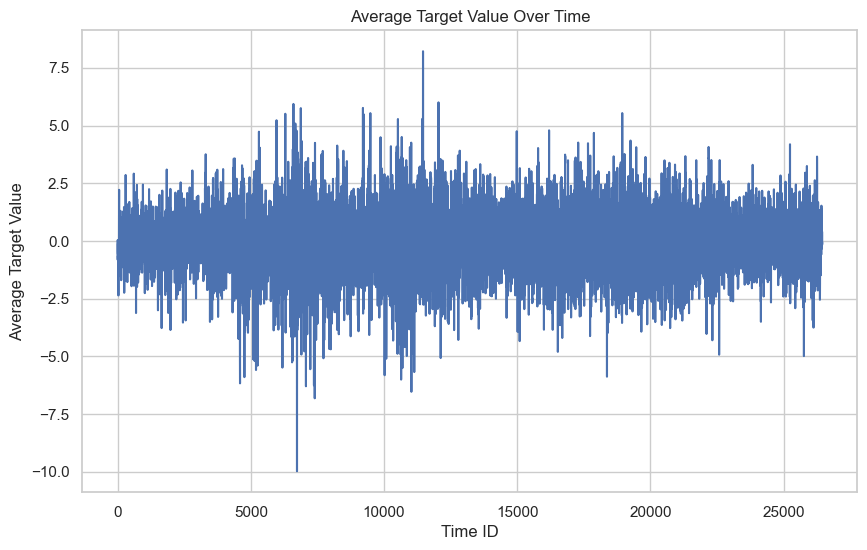

In [30]:
import matplotlib.pyplot as plt
# Calculate the average target value over time
avg_target_over_time = data.groupby('time_id')['target'].mean()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the average target value over time
avg_target_over_time.plot()

# Set the title and labels
plt.title('Average Target Value Over Time')
plt.xlabel('Time ID')
plt.ylabel('Average Target Value')

# Enable the grid
plt.grid(True)

# Save the figure with 450 DPI to the E:/ drive
plt.savefig('E:/average_target_over_time.png', dpi=450)

# Display the plot
plt.show()

<font size =4 > Scatter Plot Reference Price VS Target 

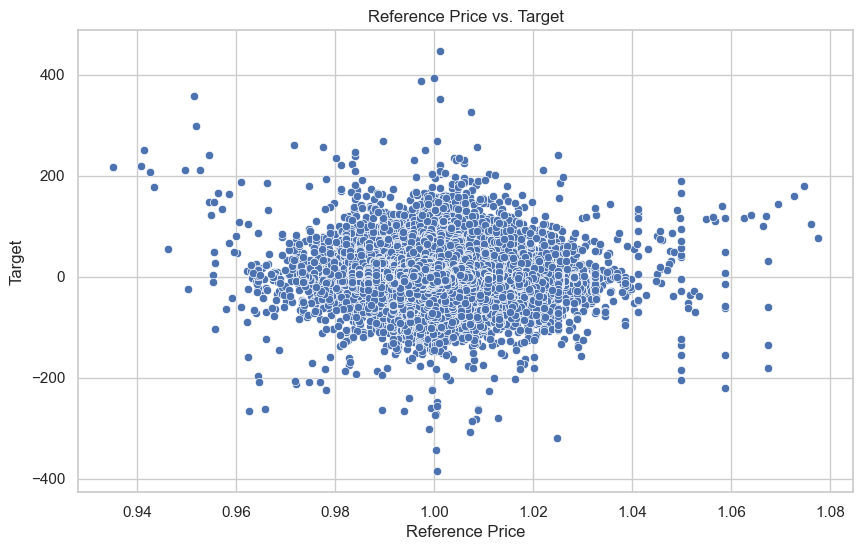

In [35]:
# 13. Scatter Plot of Reference Price vs. Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reference_price', y='target', data=data)
plt.title('Reference Price vs. Target')
plt.xlabel('Reference Price')
plt.ylabel('Target')
plt.savefig('E:/Reference Price vs. Target.png', dpi=450)
plt.show()

<font size =4>Imbalance Buy/Sell Flag vs. Target

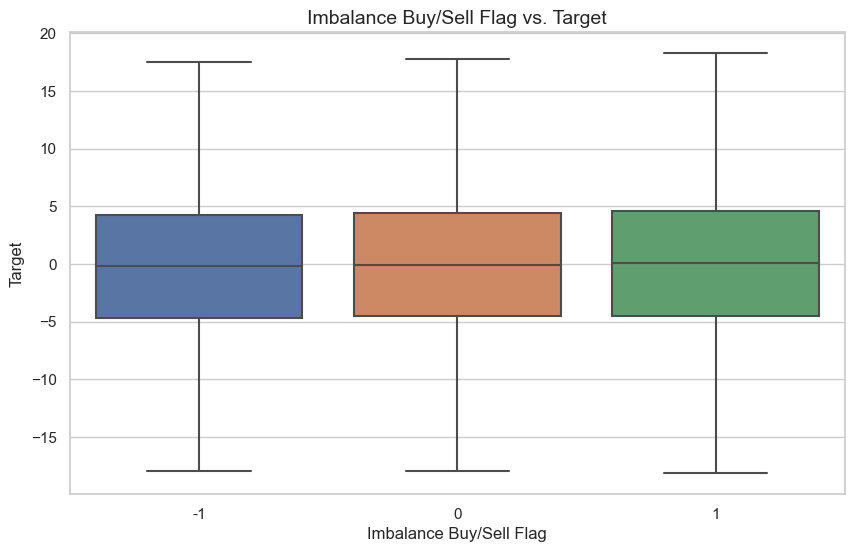

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Using 'sym' parameter to control the plotting of outliers
sns.boxplot(x='imbalance_buy_sell_flag', y='target', data=data, sym='')

plt.title('Imbalance Buy/Sell Flag vs. Target', fontsize=14)
plt.xlabel('Imbalance Buy/Sell Flag', fontsize=12)
plt.ylabel('Target', fontsize=12)

plt.savefig('E:/Imbalance Flag vs. Target.png', dpi=450)
plt.show()


<font size =4> Drop columns that are useless in the following part

In [38]:
h=[c for c in df.columns if c not in ['stock_id','date_id','time_id','row_id','target']]
correlation_matrix=df[h].corr()

<font size =4> Heatmap Between Features

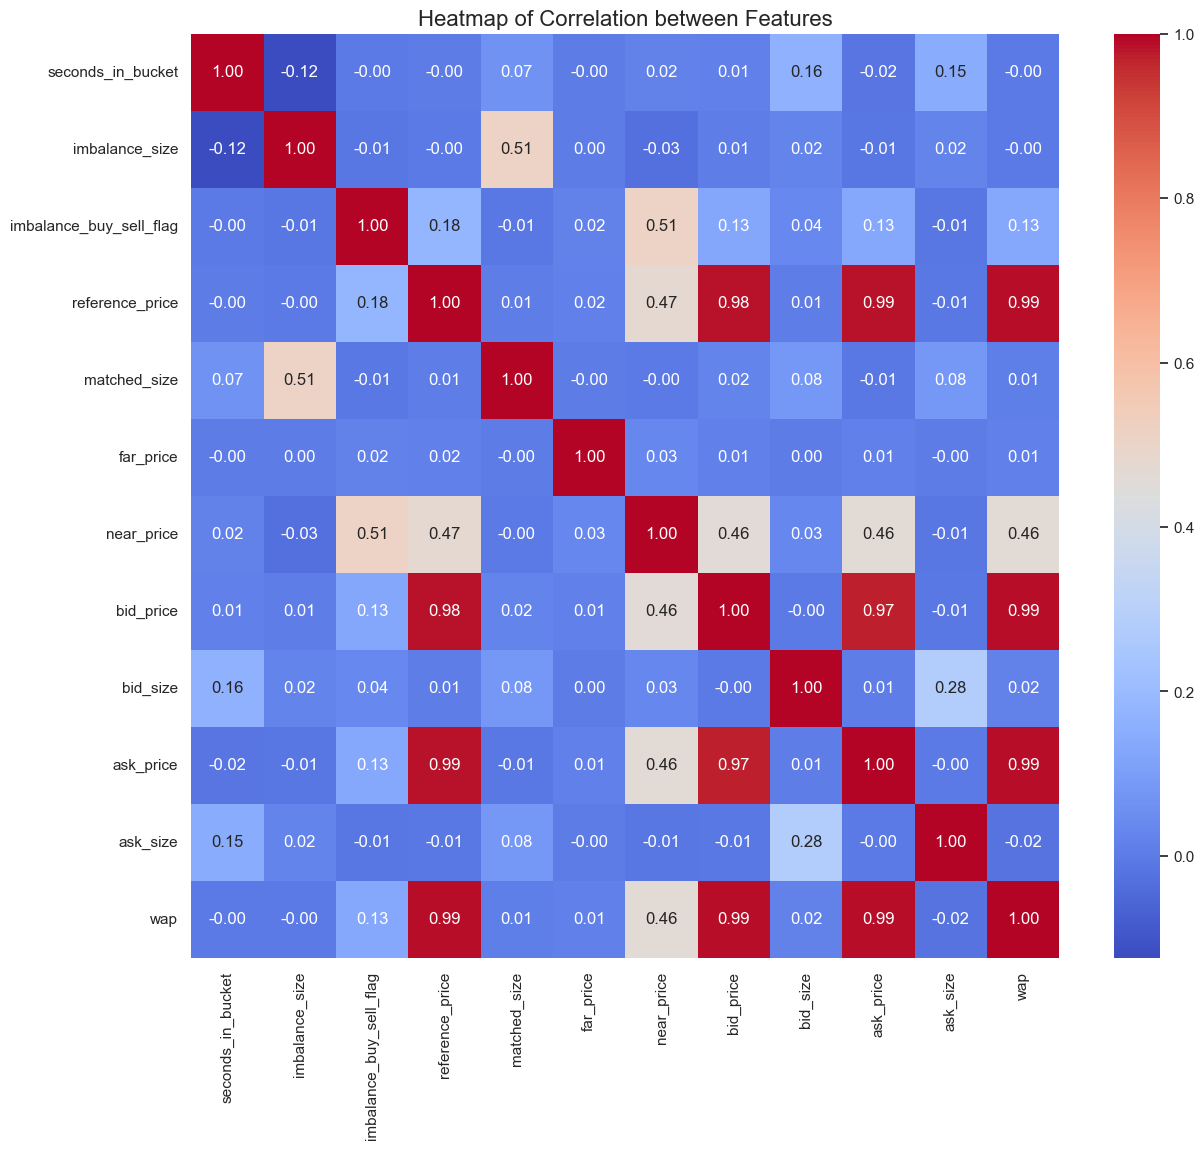

In [42]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation between Features',fontsize=16)
plt.savefig('E:/Heatmap of Correlation between Features.png', dpi=450)
plt.show()